# 3.6.2 Airline Arrival 

Using this airline arrival  and departure dataset develop an algorithm to predict flight delays. Prioritize correctly finding delayed flights and labelling them as delayed.

Data Source: Kaggle Data Set 
URL-https:http://stat-computing.org/dataexpo/2009/the-data.html

Description: The datasets contains flights arrival and departure details.This data set has 29 columns and all the relevant data to get information of delayed flights

In [2]:
import math
import warnings
from datetime import datetime
start=datetime.now()
from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
from sklearn.model_selection import cross_val_score
from sklearn import neighbors
from sklearn import tree,model_selection
from sklearn.grid_search import GridSearchCV
# A convenience for displaying visualizations.
from IPython.display import Image
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import time
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
start=datetime.now()
rfc = ensemble.RandomForestClassifier()
from sklearn.linear_model import LogisticRegression

C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be 

In [3]:
data = pd.read_csv('C:/Personal/09142640/Downloads/2008.csv').fillna(0)

In [4]:
data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.000,1955,2211.000,2225,WN,335,...,4.000,8.000,0,0,0,0.000,0.000,0.000,0.000,0.000
1,2008,1,3,4,754.000,735,1002.000,1000,WN,3231,...,5.000,10.000,0,0,0,0.000,0.000,0.000,0.000,0.000
2,2008,1,3,4,628.000,620,804.000,750,WN,448,...,3.000,17.000,0,0,0,0.000,0.000,0.000,0.000,0.000
3,2008,1,3,4,926.000,930,1054.000,1100,WN,1746,...,3.000,7.000,0,0,0,0.000,0.000,0.000,0.000,0.000
4,2008,1,3,4,1829.000,1755,1959.000,1925,WN,3920,...,3.000,10.000,0,0,0,2.000,0.000,0.000,0.000,32.000


# Exploring the data

In [5]:
data['Delay_30'] = np.where((data['ArrTime']-data['CRSArrTime'] >= 30)|(data['DepTime']-data['CRSDepTime'] >= 30) , 1, 0)
Delay_filter_30=data['Delay_30']==1
Delay_filter_nl30=data['Delay_30']!=1
data1=data[Delay_filter_30]
data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Delay_30
0,2008,1,3,4,2003.000,1955,2211.000,2225,WN,335,...,8.000,0,0,0,0.000,0.000,0.000,0.000,0.000,1
1,2008,1,3,4,754.000,735,1002.000,1000,WN,3231,...,10.000,0,0,0,0.000,0.000,0.000,0.000,0.000,0
2,2008,1,3,4,628.000,620,804.000,750,WN,448,...,17.000,0,0,0,0.000,0.000,0.000,0.000,0.000,1
3,2008,1,3,4,926.000,930,1054.000,1100,WN,1746,...,7.000,0,0,0,0.000,0.000,0.000,0.000,0.000,0
4,2008,1,3,4,1829.000,1755,1959.000,1925,WN,3920,...,10.000,0,0,0,2.000,0.000,0.000,0.000,32.000,1


In [6]:
print("Total delays per month",data1.groupby('Month')['Delay_30'].sum())

Total delays per month Month
1     145716
2     152465
3     154913
4     120650
5     118862
6     161321
7     141344
8     123873
9      73994
10     77516
11     83845
12    166461
Name: Delay_30, dtype: int32


In [11]:
data3=data[Delay_filter_30].shape[0]
data4=data[Delay_filter_nl30].shape[0]
print("Percentage of delayed flights is {0:.2f}%".format(data3/(data3+data4)*100))

Percentage of delayed flights is 21.70%


Text(0.5,1,'Total number of Delays  month wise')

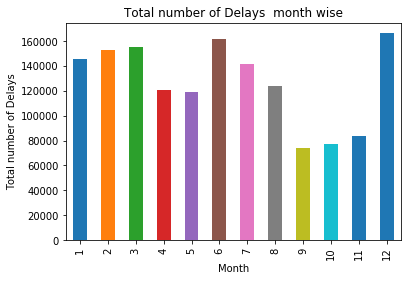

In [12]:
data1.groupby('Month')['Delay_30'].sum().plot(kind='bar')
plt.ylabel('Total number of Delays',fontsize=10)
plt.title('Total number of Delays  month wise')

We can see there are highest delays for more than 30 minutes in the month of December and then followed by other months

In [9]:
Y=data['Delay_30']
X=data[['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'FlightNum',
       'ActualElapsedTime', 'CRSElapsedTime','AirTime','ArrDelay','DepDelay','Distance', 'Cancelled', 'Diverted']]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

We will be using 7 Classification models -Naive Bayes, KNN models ,Decision tree, Random forest,Logistic Regression, SVC,Gradient Boosting to get the accuracy for each model and decide which model will be better suited to the dataset

# Naive Bayes Model

In [80]:
start=datetime.now()
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(X_train, y_train)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(X_train)



Now, we have fitted the data to Naive Bayes model so we need to calcuate the accuracy score using Cross verification,grid search cv

In [82]:
#Cross Validation
from sklearn.model_selection import cross_val_score
print("Training data accuracy: ",cross_val_score(bnb, X_train, y_train, cv=10))
print("Testing data accuracy: ",cross_val_score(bnb, X_test, y_test, cv=10))

Training data accuracy:  [0.86070805 0.86144809 0.86061864 0.86079875 0.85992318 0.86135155
 0.86099669 0.86123921 0.86096459 0.86084868]
Testing data accuracy:  [0.86313349 0.85890367 0.85884661 0.86126467 0.86007347 0.85933165
 0.86102928 0.86032312 0.86218285 0.86191893]


Accuracy score looks to be good.There is no need to use gridearchcv since there are no such hyper-paramters to tune.Now,lets go ahead with Classification report

In [83]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred))

             precision    recall  f1-score   support

          0       0.95      0.86      0.91   4391190
          1       0.63      0.85      0.73   1216592

avg / total       0.89      0.86      0.87   5607782



In [84]:
#AUC
from sklearn.metrics import roc_auc_score
print ("AUC Score:" ,roc_auc_score(y_train, y_pred))

AUC Score: 0.8580951603607022


Classification report and AUC accuracy seems to be good.Its F1-score looks to be good as well.Now, we are going to use PCA to get the optimum number of components to improve the accuracy of the model

PCA

In [91]:
X_pca = PCA(n_components=7)
X_pca.fit(X_train)
X_train_pca = X_pca.transform(X_train)
X_test_pca = X_pca.transform(X_test)
#Using BNB on reduced PCA dataset 
bnb.fit(X_train_pca, y_train)
y_pred = bnb.predict(X_train_pca)

In [92]:
print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    X_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [7.50815418e-01 1.57995634e-01 5.53153343e-02 2.03982247e-02
 1.20461842e-02 2.75690231e-03 4.58571404e-04]


In [93]:
#Cross Validation
from sklearn.model_selection import cross_val_score
print("Training data accuracy: ",cross_val_score(bnb, X_train_pca, y_train, cv=10))
print("Testing data accuracy: ",cross_val_score(bnb, X_test_pca, y_test, cv=10))

Training data accuracy:  [0.89035788 0.8909196  0.89022216 0.88983519 0.88919858 0.89026139
 0.88983698 0.89087304 0.89094972 0.88971393]
Testing data accuracy:  [0.89068797 0.89023146 0.88982489 0.88923285 0.88928278 0.88884768
 0.89053818 0.88988195 0.89119999 0.89011577]


In [94]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred))

             precision    recall  f1-score   support

          0       0.95      0.91      0.93   4391190
          1       0.71      0.82      0.76   1216592

avg / total       0.90      0.89      0.89   5607782



The classification matrix is looking good.F-score is on the better side which is a good news.Its looks like using PCA has improved the results.Now,lets use Confusion Matrix to check the accuracy as well

In [95]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
print(confusion_matrix(y_train, y_pred))
print('Accuracy Score :',accuracy_score(y_train, y_pred))


[[3990627  400563]
 [ 215077 1001515]]
Accuracy Score : 0.8902168450913391


In [96]:
#AUC
from sklearn.metrics import roc_auc_score
print ("AUC Score:" ,roc_auc_score(y_train, y_pred))

AUC Score: 0.8659969210220574


Confusion Matrix and AUC accuracy is very good.Now,we are going to use selectkbest to get the best features

In [97]:
#selectkbest to get the scores of the best parameters
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
names =['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'FlightNum',
       'ActualElapsedTime', 'CRSElapsedTime','AirTime','ArrDelay','DepDelay','Distance', 'Cancelled', 'Diverted']
#names = X_train.columns[indices[:n_indices]]
skb = SelectKBest(score_func=f_classif,k=7)
X_train_kbest = skb.fit_transform(X_train, y_train)
for n in range(0, len(names)):
 print(names[n], skb.scores_[n])


C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [0] are constant.
  UserWarning)
C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Year nan
Month 9105.920928078025
DayofMonth 0.19998160169708612
DayOfWeek 729.2934591247921
DepTime 295845.0283246868
CRSDepTime 115012.21551382955
ArrTime 146929.82888242597
CRSArrTime 90627.58840487583
FlightNum 232.6334491362069
ActualElapsedTime 78044.0723908888
CRSElapsedTime 16456.00912983227
AirTime 30051.566946492214
ArrDelay 3484241.265263476
DepDelay 2728484.956354014
Distance 10972.077758931988
Cancelled 30155.756866015516
Diverted 2868.9687624607855


In [98]:
#Fitting and transforming data to selectkbest
skb.fit(X_train, y_train)
X_train_skb = skb.transform(X_train)
X_test_skb = skb.transform(X_test)
bnb.fit(X_train_skb, y_train)
y_pred = bnb.predict(X_train_skb)

C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [0] are constant.
  UserWarning)
C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Using cross validation to get the accuracy

In [99]:
#Cross Validation
from sklearn.model_selection import cross_val_score
print("Training data accuracy: ",cross_val_score(bnb, X_train_skb, y_train, cv=10))
print("Testing data accuracy: ",cross_val_score(bnb, X_test_skb, y_test, cv=10))

Training data accuracy:  [0.86070983 0.86144809 0.86062042 0.86079875 0.85992496 0.86135155
 0.86099669 0.86124099 0.86096459 0.86085224]
Testing data accuracy:  [0.86313349 0.85890367 0.85884661 0.86126467 0.86007347 0.85933165
 0.86102928 0.86032312 0.86218285 0.86191893]


In [100]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred))

             precision    recall  f1-score   support

          0       0.95      0.86      0.91   4391190
          1       0.63      0.85      0.73   1216592

avg / total       0.89      0.86      0.87   5607782



We notice that the classification report is good.We need to play with the value of k to get the optimum accuracy.When k=7, the f1-score  becomes good.One thing we noticed , if you do not play with k values there might be lot of variance in the accuracy using classification report.Now,lets get the accuracy using confusion matrix and AUC

In [101]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
print(confusion_matrix(y_train, y_pred))
print('Accuracy Score :',accuracy_score(y_train, y_pred))

[[3789736  601454]
 [ 178640 1037952]]
Accuracy Score : 0.860890812089343


In [102]:
#AUC
from sklearn.metrics import roc_auc_score
print ("AUC Score:" ,roc_auc_score(y_train, y_pred))

AUC Score: 0.858097626265459


As we notice above, the accuracy score is good using both Confusion Matrix and AUC.We did notice that accuracy of the model using PCA is better than using selectkbest.Also, there is significant fluctuation in accuracy  when using Selectkbest.

In [103]:
print(datetime.now()-start)

0:12:56.094500


# KNN model Classifier

In [11]:
start=datetime.now()
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_train)


Now, we have fitted the data to KNN Classifier model so we need to calcuate the accuracy score using Cross verification,grid search cv,Classification report, AUC and Confusion Matrix

Lets go ahead with Gridsearchcv and find out its accuracy

In [12]:
params = {'n_neighbors':[5,6],
          'leaf_size':[1,2]
                  }
#Making models with hyper parameters sets
grid_class = model_selection.GridSearchCV(knn_model, param_grid=params)
#Learning
grid_class.fit(X_train,y_train)
#The best hyper parameters set

results = grid_class.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",grid_class.best_params_)
print(grid_class.best_score_)
final_model = grid_class.best_estimator_
print(final_model)

[{'leaf_size': 1, 'n_neighbors': 5}, {'leaf_size': 1, 'n_neighbors': 6}, {'leaf_size': 2, 'n_neighbors': 5}, {'leaf_size': 2, 'n_neighbors': 6}]
[0.95220537 0.93966931 0.95220537 0.9396717 ]
[0.96914503 0.9550664  0.96914503 0.9550664 ]
Best Hyper Parameters:
 {'leaf_size': 1, 'n_neighbors': 5}
0.9522053739598979
KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [13]:
#Cross Validation
from sklearn.model_selection import cross_val_score
print("Training data accuracy: ",cross_val_score(knn_model, X_train, y_train, cv=10))
print("Testing data accuracy: ",cross_val_score(knn_model, X_test, y_test, cv=10))

Training data accuracy:  [0.97909067 0.97869728 0.97814892 0.97828005 0.97838734 0.97804163
 0.97801779 0.97802971 0.97781513 0.97832773]
Testing data accuracy:  [0.94406828 0.94683387 0.94573717 0.94559413 0.94464047 0.94726302
 0.94607095 0.94454246 0.94487363 0.94606581]


As we see above,cross validation accuracy score looks to be very good.

In [14]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    627450
          1       1.00      1.00      1.00    211410

avg / total       1.00      1.00      1.00    838860



In [15]:
#AUC
from sklearn.metrics import roc_auc_score
print ("AUC Score:" ,roc_auc_score(y_train, y_pred))

AUC Score: 1.0


Classification report and AUC seem to be perfect even before using dimension reduction technique PCA.Now,lets use PCA to get the accuracy using Gridsearch,Cross validation,classification report,Confusion Matrix

PCA

In [16]:
#PCA to get the best features/components
X_pca = PCA(n_components=7)
X_pca.fit(X_train)
X_train_pca = X_pca.transform(X_train)
X_test_pca = X_pca.transform(X_test)
#Using BNB on reduced PCA dataset 
knn_model.fit(X_train_pca, y_train)
y_pred = knn_model.predict(X_train_pca)

In [17]:
print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    X_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [7.53890305e-01 1.57844213e-01 4.97324466e-02 2.08602984e-02
 1.40471259e-02 2.88932045e-03 4.98410545e-04]


The above shows the variance per component which looks ok.Now,we will use Gridsearch cv to get the best hyper parameters to improve the accuracy and performance of the model


In [18]:
#Using Grid search  for finding the best set of parameters with random Forest model
params = {'n_neighbors':[5,6],
          'leaf_size':[1,2]
                  }
#Making models with hyper parameters sets
grid_class = model_selection.GridSearchCV(knn_model, param_grid=params)
#Learning
grid_class.fit(X_train_pca,y_train)
#The best hyper parameters set

results = grid_class.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",grid_class.best_params_)
print(grid_class.best_score_)
final_model = grid_class.best_estimator_
print(final_model)


[{'leaf_size': 1, 'n_neighbors': 5}, {'leaf_size': 1, 'n_neighbors': 6}, {'leaf_size': 2, 'n_neighbors': 5}, {'leaf_size': 2, 'n_neighbors': 6}]
[0.95469089 0.94280214 0.95469089 0.94280214]
[0.97077283 0.95758291 0.97077283 0.95758291]
Best Hyper Parameters:
 {'leaf_size': 1, 'n_neighbors': 5}
0.9546908900174046
KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [19]:
#Cross Validation
from sklearn.model_selection import cross_val_score
print("Training data accuracy: ",cross_val_score(knn_model, X_train_pca, y_train, cv=10))
print("Testing data accuracy: ",cross_val_score(knn_model, X_test_pca, y_test, cv=10))

Training data accuracy:  [0.98103378 0.98077152 0.98021124 0.97963903 0.98040197 0.97986553
 0.98030661 0.97963903 0.97999666 0.98016356]
Testing data accuracy:  [0.94654778 0.94821667 0.94778753 0.94807362 0.94735838 0.94983788
 0.94878886 0.94706976 0.94687649 0.94749642]


In [20]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    627450
          1       1.00      1.00      1.00    211410

avg / total       1.00      1.00      1.00    838860



In [21]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
print(confusion_matrix(y_train, y_pred))
print('Accuracy Score :',accuracy_score(y_train, y_pred))

[[627450      0]
 [     0 211410]]
Accuracy Score : 1.0


In [22]:
#AUC
from sklearn.metrics import roc_auc_score
print ("AUC Score:" ,roc_auc_score(y_train, y_pred))

AUC Score: 1.0


As observed above,Classification report,Confusion matrix ,AUC have very good accuracy scores.Now, we will use another dimension reduction technique -selectkbest to get the  optimum features and will compare the accuracies with PCA

SelectKBest

In [23]:
#selectkbest to get the scores of the best parameters
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
names =['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'FlightNum',
       'ActualElapsedTime', 'CRSElapsedTime','AirTime','ArrDelay','DepDelay','Distance', 'Cancelled', 'Diverted']
#names = X_train.columns[indices[:n_indices]]
skb = SelectKBest(score_func=f_classif,k=7)
X_train_kbest = skb.fit_transform(X_train, y_train)
for n in range(0, len(names)):
 print(names[n], skb.scores_[n])

C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [0] are constant.
  UserWarning)
C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Year nan
Month 808.9553696705038
DayofMonth 403.2220170656302
DayOfWeek 79.25829433649136
DepTime 48053.52560992163
CRSDepTime 14475.04324695549
ArrTime 26834.577245858956
CRSArrTime 11577.911251133937
FlightNum 1547.4690296947113
ActualElapsedTime 9970.953035997813
CRSElapsedTime 592.5105036295506
AirTime 3248.3114961646806
ArrDelay 529776.2587817839
DepDelay 413990.54075245414
Distance 340.9383439359148
Cancelled 9575.119516998262
Diverted 95.96391089238634


In [25]:
#Fitting and transforming data to selectkbest
skb.fit(X_train, y_train)
X_train_skb = skb.transform(X_train)
X_test_skb = skb.transform(X_test)
knn_model.fit(X_train_skb, y_train)
y_pred = knn_model.predict(X_train_skb)

C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [0] are constant.
  UserWarning)
C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Now, we will use Seleckbest transformed data to get the accuracy using gridsearchcv,cross validation,classification report and Confusion Matrix

In [26]:
#Gridsearch cv to get the best peforming hyper parameters
params = {'n_neighbors':[5,6,7],
          'leaf_size':[1,2]
                  }
#Making models with hyper parameters sets
grid_class = model_selection.GridSearchCV(knn_model, param_grid=params)
#Learning
grid_class.fit(X_train_skb,y_train)
#The best hyper parameters set

results = grid_class.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",grid_class.best_params_)
print(grid_class.best_score_)
final_model = grid_class.best_estimator_
print(final_model)

[{'leaf_size': 1, 'n_neighbors': 5}, {'leaf_size': 1, 'n_neighbors': 6}, {'leaf_size': 1, 'n_neighbors': 7}, {'leaf_size': 2, 'n_neighbors': 5}, {'leaf_size': 2, 'n_neighbors': 6}, {'leaf_size': 2, 'n_neighbors': 7}]
[0.99216794 0.99072551 0.99153375 0.99216913 0.99072312 0.99153613]
[0.99499022 0.99299704 0.99379575 0.99499201 0.99299526 0.99379336]
Best Hyper Parameters:
 {'leaf_size': 2, 'n_neighbors': 5}
0.9921691343013137
KNeighborsClassifier(algorithm='auto', leaf_size=2, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [27]:
#Cross Validation
from sklearn.model_selection import cross_val_score
print("Training data accuracy: ",cross_val_score(knn_model, X_train_skb, y_train, cv=10))
print("Testing data accuracy: ",cross_val_score(knn_model, X_test_skb, y_test, cv=10))

Training data accuracy:  [0.99395608 0.99403953 0.99387264 0.99359846 0.99407529 0.99325275
 0.99350309 0.99378919 0.99365806 0.99378919]
Testing data accuracy:  [0.99022506 0.99108335 0.99108335 0.98936677 0.99008201 0.98888995
 0.99046348 0.99027228 0.98941345 0.98955651]


In [28]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    627450
          1       1.00      1.00      1.00    211410

avg / total       1.00      1.00      1.00    838860



In [29]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
print(confusion_matrix(y_train, y_pred))
print('Accuracy Score :',accuracy_score(y_train, y_pred))

[[627450      0]
 [     0 211410]]
Accuracy Score : 1.0


In [30]:
#AUC
from sklearn.metrics import roc_auc_score
print ("AUC Score:" ,roc_auc_score(y_train, y_pred))

AUC Score: 1.0


In [31]:
print(datetime.now()-start)

0:47:03.925000


As observed above, Cross validation, Classification Report, Confusion Matrix ,AUC have very good accuracies.If we compare both PCA and Selectkbest,there doesnt seem to be much difference in terms of accuracies and run time is almost similar as well

# Decision tree

In [36]:
start=datetime.now()
decision_tree = tree.DecisionTreeClassifier(max_depth=50)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_train)

Now, we have fitted the data to Decision Tree model so we need to calcuate the accuracy score using grid search cv,Cross verification,Classification report, AUC and Confusion Matrix

In [37]:
dt_grid={'max_depth':[50],'max_features': [11]}
grid_class_dt=model_selection.GridSearchCV(decision_tree,dt_grid,cv=10)
grid_class_dt.fit(X_train, y_train)
results = grid_class.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",grid_class.best_params_)
print(grid_class.best_score_)
final_model = grid_class.best_estimator_
print(final_model)

[{'leaf_size': 1, 'n_neighbors': 5}, {'leaf_size': 1, 'n_neighbors': 6}, {'leaf_size': 1, 'n_neighbors': 7}, {'leaf_size': 2, 'n_neighbors': 5}, {'leaf_size': 2, 'n_neighbors': 6}, {'leaf_size': 2, 'n_neighbors': 7}]
[0.99216794 0.99072551 0.99153375 0.99216913 0.99072312 0.99153613]
[0.99499022 0.99299704 0.99379575 0.99499201 0.99299526 0.99379336]
Best Hyper Parameters:
 {'leaf_size': 2, 'n_neighbors': 5}
0.9921691343013137
KNeighborsClassifier(algorithm='auto', leaf_size=2, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [34]:
#Cross Validation
from sklearn.model_selection import cross_val_score
print("Training data accuracy: ",cross_val_score(decision_tree, X_train, y_train, cv=10))
print("Testing data accuracy: ",cross_val_score(decision_tree, X_test, y_test, cv=10))

Training data accuracy:  [0.93508142 0.92734678 0.92472064 0.93553975 0.93044739 0.93338219
 0.94600224 0.93219615 0.91842228 0.94580778]
Testing data accuracy:  [0.88627732 0.8606374  0.83601347 0.89722042 0.89166293 0.85862593
 0.86537165 0.89297038 0.85236773 0.86037227]


Cross validation accuracy seems ok..Lets go ahead with Classification report and AUC

In [38]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    627450
          1       1.00      1.00      1.00    211410

avg / total       1.00      1.00      1.00    838860



In [219]:
#AUC
from sklearn.metrics import roc_auc_score
print ("AUC Score:" ,roc_auc_score(y_train, y_pred))

AUC Score: 1.0


Classification report and AUC seem to be perfect even before using dimension reduction technique PCA.Now,lets use PCA to get the accuracy using Gridsearch,Cross validation,classification report,Confusion Matrix

PCA

In [40]:
#PCA to get the best features/components
X_pca = PCA(n_components=7)
X_pca.fit(X_train)
X_train_pca = X_pca.transform(X_train)
X_test_pca = X_pca.transform(X_test)
#Using Decision Tree on reduced PCA dataset 
decision_tree.fit(X_train_pca, y_train)
y_pred = decision_tree.predict(X_train_pca)

In [41]:
print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    X_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [7.53890305e-01 1.57844213e-01 4.97324466e-02 2.08602984e-02
 1.40471259e-02 2.88932045e-03 4.98410545e-04]


The above shows the variance per component which looks ok.Now,we will use Gridsearch cv to get the best hyper parameters to improve the accuracy and performance of the model

In [42]:
#Using Grid search  for finding the best set of parameters with random Forest model
dt_grid={'max_depth':[50],'max_features': [7]}
grid_class=model_selection.GridSearchCV(decision_tree,dt_grid,cv=6)
grid_class.fit(X_train_pca, y_train)
results = grid_class.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",grid_class.best_params_)
print(grid_class.best_score_)
final_model = grid_class.best_estimator_
print(final_model)

[{'max_depth': 50, 'max_features': 7}]
[0.98286126]
[1.]
Best Hyper Parameters:
 {'max_depth': 50, 'max_features': 7}
0.982861264096512
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=50,
            max_features=7, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [43]:
#Cross Validation
from sklearn.model_selection import cross_val_score
print("Training data accuracy: ",cross_val_score(decision_tree, X_train_pca, y_train, cv=10))
print("Testing data accuracy: ",cross_val_score(decision_tree, X_test_pca, y_test, cv=10))

Training data accuracy:  [0.98344181 0.98433588 0.9837756  0.98327492 0.98382328 0.98372792
 0.98378752 0.98341797 0.98331068 0.98356102]
Testing data accuracy:  [0.97224871 0.96962617 0.97043677 0.97167652 0.97329773 0.97148579
 0.97191493 0.97491774 0.97091082 0.97148307]


In [44]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    627450
          1       1.00      1.00      1.00    211410

avg / total       1.00      1.00      1.00    838860



In [45]:
#AUC
from sklearn.metrics import roc_auc_score
print ("AUC Score:" ,roc_auc_score(y_train, y_pred))

AUC Score: 1.0


In [46]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
print(confusion_matrix(y_train, y_pred))
print('Accuracy Score :',accuracy_score(y_train, y_pred))

[[627450      0]
 [     0 211410]]
Accuracy Score : 1.0


As observed above,Classification report,Confusion matrix ,AUC have very good accuracy scores.Now, we will use another dimension reduction technique -selectkbest to get the optimum features and will compare the accuracies with PCA

SelectKbest

In [47]:
#selectkbest to get the scores of the best parameters
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
names =['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'FlightNum',
       'ActualElapsedTime', 'CRSElapsedTime','AirTime','ArrDelay','DepDelay','Distance', 'Cancelled', 'Diverted']
#names = X_train.columns[indices[:n_indices]]
skb = SelectKBest(score_func=f_classif,k=7)
X_train_kbest = skb.fit_transform(X_train, y_train)
for n in range(0, len(names)):
 print(names[n], skb.scores_[n])

Year nan
Month 808.9553696705038
DayofMonth 403.2220170656302
DayOfWeek 79.25829433649136
DepTime 48053.52560992163
CRSDepTime 14475.04324695549
ArrTime 26834.577245858956
CRSArrTime 11577.911251133937
FlightNum 1547.4690296947113
ActualElapsedTime 9970.953035997813
CRSElapsedTime 592.5105036295506
AirTime 3248.3114961646806
ArrDelay 529776.2587817839
DepDelay 413990.54075245414
Distance 340.9383439359148
Cancelled 9575.119516998262
Diverted 95.96391089238634


C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [0] are constant.
  UserWarning)
C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [48]:
#Fitting and transforming data to selectkbest
skb.fit(X_train, y_train)
X_train_skb = skb.transform(X_train)
X_test_skb = skb.transform(X_test)
decision_tree.fit(X_train_skb, y_train)
y_pred = decision_tree.predict(X_train_skb)

C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [0] are constant.
  UserWarning)
C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Now, we will use Seleckbest transformed data to get the accuracy using gridsearchcv,cross validation,classification report and Confusion Matrix

In [50]:
dt_grid={'max_depth':[50],'max_features': [7]}
grid_class_dt=model_selection.GridSearchCV(decision_tree,dt_grid,cv=6)
grid_class_dt.fit(X_train_skb, y_train)
results = grid_class_dt.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",grid_class_dt.best_params_)
print(grid_class_dt.best_score_)
final_model = grid_class_dt.best_estimator_
print(final_model)

[{'max_depth': 50, 'max_features': 7}]
[0.9916613]
[0.99999881]
Best Hyper Parameters:
 {'max_depth': 50, 'max_features': 7}
0.991661302243521
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=50,
            max_features=7, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [51]:
#Cross Validation
from sklearn.model_selection import cross_val_score
print("Training data accuracy: ",cross_val_score(decision_tree, X_train_skb, y_train, cv=10))
print("Testing data accuracy: ",cross_val_score(decision_tree, X_test_skb, y_test, cv=10))

Training data accuracy:  [0.99173879 0.99200105 0.99164342 0.991858   0.99190568 0.99172687
 0.99346732 0.99266862 0.99245404 0.99307393]
Testing data accuracy:  [0.98564753 0.98383559 0.98374023 0.9854568  0.9865535  0.98197597
 0.98512302 0.98588527 0.9817835  0.98240343]


In [52]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    627450
          1       1.00      1.00      1.00    211410

avg / total       1.00      1.00      1.00    838860



In [53]:
#AUC
from sklearn.metrics import roc_auc_score
print ("AUC Score:" ,roc_auc_score(y_train, y_pred))

AUC Score: 0.9999976349273922


In [54]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
print(confusion_matrix(y_train, y_pred))
print('Accuracy Score :',accuracy_score(y_train, y_pred))

[[627450      0]
 [     1 211409]]
Accuracy Score : 0.9999988079059676


In [55]:
print(datetime.now()-start)

0:16:51.517000


As observed above,Classification report,Confusion matrix ,AUC have very good accuracy scores.If we compare the accuracy score between PCA and SelectKbest, they are similar so no real difference between them.Overall,Decision Tree accuaracy is very good.

# Random Forest

In [56]:
start=datetime.now()
from sklearn import ensemble
rfc = ensemble.RandomForestClassifier(max_depth=10,n_estimators= 100)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_train)

Now, we have fitted the data to Random Forest model so we need to calcuate the accuracy score using Cross verification,grid search cv,Classification report, AUC

In [57]:
#Gridsearchcv to get the best parameters
dt_grid={'max_depth':[3,4,5],'max_features': [7]}

grid_class=model_selection.GridSearchCV(rfc,dt_grid,cv=6)
grid_class.fit(X_train, y_train)
results = grid_class.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",grid_class.best_params_)
print(grid_class.best_score_)
final_model = grid_class.best_estimator_
print(final_model)

[{'max_depth': 3, 'max_features': 7}, {'max_depth': 4, 'max_features': 7}, {'max_depth': 5, 'max_features': 7}]
[0.9228596  0.92570512 0.92768162]
[0.92301624 0.92568057 0.92780535]
Best Hyper Parameters:
 {'max_depth': 5, 'max_features': 7}
0.9276816155258327
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [58]:
#Cross Validation
from sklearn.model_selection import cross_val_score
print("Training data accuracy: ",cross_val_score(rfc, X_train, y_train, cv=10))
print("Testing data accuracy: ",cross_val_score(rfc, X_test, y_test, cv=10))

Training data accuracy:  [0.93933433 0.94208807 0.94111055 0.93970388 0.94176621 0.94027609
 0.94009727 0.93870252 0.9393701  0.94041914]
Testing data accuracy:  [0.93767881 0.94149342 0.93629601 0.93930002 0.9404444  0.93753576
 0.93949075 0.9384388  0.93948498 0.94115403]


In [59]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred))

             precision    recall  f1-score   support

          0       0.93      0.99      0.96    627450
          1       0.98      0.79      0.87    211410

avg / total       0.94      0.94      0.94    838860



In [60]:
#AUC
from sklearn.metrics import roc_auc_score
print ("AUC Score:" ,roc_auc_score(y_train, y_pred))

AUC Score: 0.8925724402289951


If we notice above, the accuracy scores for Cross Validation,Classification report and AUC are good.Now lets use PCA to select optimum features 

In [61]:
#PCA to get the best features/components
X_pca = PCA(n_components=7)
X_pca.fit(X_train)
X_train_pca = X_pca.transform(X_train)
X_test_pca = X_pca.transform(X_test)
#Using Decision Tree on reduced PCA dataset 
rfc.fit(X_train_pca, y_train)
y_pred = rfc.predict(X_train_pca)

In [62]:
print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    X_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [7.53890305e-01 1.57844213e-01 4.97324466e-02 2.08602984e-02
 1.40471259e-02 2.88932045e-03 4.98410545e-04]


The above shows the variance per component which looks ok.Now,we will use Gridsearch cv to get the best hyper parameters to improve the accuracy and performance of the model

In [63]:
#Using Grid search  for finding the best set of parameters with random Forest model
dt_grid={'max_depth':[3,4,5],'max_features': [7]}
grid_class=model_selection.GridSearchCV(rfc,dt_grid,cv=6)
grid_class.fit(X_train_pca, y_train)
results = grid_class.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",grid_class.best_params_)
print(grid_class.best_score_)
final_model = grid_class.best_estimator_
print(final_model)

[{'max_depth': 3, 'max_features': 7}, {'max_depth': 4, 'max_features': 7}, {'max_depth': 5, 'max_features': 7}]
[0.91412631 0.92030136 0.92773526]
[0.91425077 0.92051856 0.92802255]
Best Hyper Parameters:
 {'max_depth': 5, 'max_features': 7}
0.9277352597572897
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [64]:
#Cross Validation
from sklearn.model_selection import cross_val_score
print("Training data accuracy: ",cross_val_score(rfc, X_train_pca, y_train, cv=10))
print("Testing data accuracy: ",cross_val_score(rfc, X_test_pca, y_test, cv=10))

Training data accuracy:  [0.94926448 0.95133872 0.95082612 0.95009894 0.95139833 0.94982476
 0.95290036 0.94889493 0.95079036 0.95191093]
Testing data accuracy:  [0.94931337 0.95303261 0.94864581 0.95246042 0.95241274 0.94726302
 0.95041007 0.95055076 0.94883166 0.95274201]


In [269]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred))

             precision    recall  f1-score   support

          0       0.97      1.00      0.98      8521
          1       0.99      0.93      0.96      3988

avg / total       0.98      0.98      0.98     12509



In [270]:
#AUC
from sklearn.metrics import roc_auc_score
print ("AUC Score:" ,roc_auc_score(y_train, y_pred))

AUC Score: 0.9657592069719309


In [65]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
print(confusion_matrix(y_train, y_pred))
print('Accuracy Score :',accuracy_score(y_train, y_pred))

[[619562   7888]
 [ 32514 178896]]
Accuracy Score : 0.9518370169038933


As noticed that the accuracy increased after using PCA.So,using PCA was useful here.Now,we will use Selectkbest and compare it with PCA for the accuracies of the model

Selectkbest

In [66]:
#selectkbest to get the scores of the best parameters
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
names =['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'FlightNum',
       'ActualElapsedTime', 'CRSElapsedTime','AirTime','ArrDelay','DepDelay','Distance', 'Cancelled', 'Diverted']
#names = X_train.columns[indices[:n_indices]]
skb = SelectKBest(score_func=f_classif,k=7)
X_train_kbest = skb.fit_transform(X_train, y_train)
for n in range(0, len(names)):
 print(names[n], skb.scores_[n])

Year nan
Month 808.9553696705038
DayofMonth 403.2220170656302
DayOfWeek 79.25829433649136
DepTime 48053.52560992163
CRSDepTime 14475.04324695549
ArrTime 26834.577245858956
CRSArrTime 11577.911251133937
FlightNum 1547.4690296947113
ActualElapsedTime 9970.953035997813
CRSElapsedTime 592.5105036295506
AirTime 3248.3114961646806
ArrDelay 529776.2587817839
DepDelay 413990.54075245414
Distance 340.9383439359148
Cancelled 9575.119516998262
Diverted 95.96391089238634


C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [0] are constant.
  UserWarning)
C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [67]:
#Fitting and transforming data to selectkbest
skb.fit(X_train, y_train)
X_train_skb = skb.transform(X_train)
X_test_skb = skb.transform(X_test)
rfc.fit(X_train_skb, y_train)
y_pred = rfc.predict(X_train_skb)

C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [0] are constant.
  UserWarning)
C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [68]:
#Gridsearchcv to get the best parameters
dt_grid={'max_depth':[3,4,5],'max_features': [7]}

grid_class=model_selection.GridSearchCV(rfc,dt_grid,cv=6)
grid_class.fit(X_train, y_train)
results = grid_class.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",grid_class.best_params_)
print(grid_class.best_score_)
final_model = grid_class.best_estimator_
print(final_model)

[{'max_depth': 3, 'max_features': 7}, {'max_depth': 4, 'max_features': 7}, {'max_depth': 5, 'max_features': 7}]
[0.92262714 0.92601388 0.92766612]
[0.92269962 0.92612522 0.92776625]
Best Hyper Parameters:
 {'max_depth': 5, 'max_features': 7}
0.9276661183034117
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [69]:
#Cross Validation
from sklearn.model_selection import cross_val_score
print("Training data accuracy: ",cross_val_score(rfc, X_train, y_train, cv=10))
print("Testing data accuracy: ",cross_val_score(rfc, X_test, y_test, cv=10))

Training data accuracy:  [0.93928665 0.94133705 0.94137282 0.93941778 0.94027609 0.93879789
 0.94133705 0.93903631 0.93858332 0.94173044]
Testing data accuracy:  [0.9360576  0.94216098 0.93596224 0.9393477  0.9396338  0.93844173
 0.93815564 0.93944018 0.94086791 0.94086791]


In [70]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred))

             precision    recall  f1-score   support

          0       0.94      1.00      0.97    627450
          1       0.98      0.81      0.89    211410

avg / total       0.95      0.95      0.95    838860



In [71]:
#AUC
from sklearn.metrics import roc_auc_score
print ("AUC Score:" ,roc_auc_score(y_train, y_pred))

AUC Score: 0.9026302205981189


In [72]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
print(confusion_matrix(y_train, y_pred))
print('Accuracy Score :',accuracy_score(y_train, y_pred))

[[624334   3116]
 [ 40120 171290]]
Accuracy Score : 0.9484586224161362


In [73]:
print(datetime.now()-start)

6:20:21.249358


We notice that accuracy scores of Classification report,AUC and Confusion are very good but if we compare it with PCA, the accuracy using PCA are slightly better.

# Logistic Regression

In [74]:
start = datetime.now()
lr = LogisticRegression(C=1e9)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)

We will now get the accuracies using Gridsearchcv,Cross Validation,Classification Report below

In [75]:
#Gridsearchcv to get the best hyper-parameters
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=model_selection.GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)
results = logreg_cv.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",logreg_cv.best_params_)
print(logreg_cv.best_score_)
final_model = logreg_cv.best_estimator_
print(final_model)

[{'C': 0.001, 'penalty': 'l1'}, {'C': 0.001, 'penalty': 'l2'}, {'C': 0.01, 'penalty': 'l1'}, {'C': 0.01, 'penalty': 'l2'}, {'C': 0.1, 'penalty': 'l1'}, {'C': 0.1, 'penalty': 'l2'}, {'C': 1.0, 'penalty': 'l1'}, {'C': 1.0, 'penalty': 'l2'}, {'C': 10.0, 'penalty': 'l1'}, {'C': 10.0, 'penalty': 'l2'}, {'C': 100.0, 'penalty': 'l1'}, {'C': 100.0, 'penalty': 'l2'}, {'C': 1000.0, 'penalty': 'l1'}, {'C': 1000.0, 'penalty': 'l2'}]
[0.92844694 0.92849939 0.92862933 0.928528   0.92874258 0.92853039
 0.92874139 0.92852085 0.92874616 0.928528   0.92874258 0.92853635
 0.92874377 0.92851012]
[0.92846535 0.92856059 0.92865463 0.92854112 0.9287692  0.92854482
 0.92875728 0.92855622 0.92875702 0.92854323 0.92875265 0.92855198
 0.92876457 0.9285484 ]
Best Hyper Parameters:
 {'C': 10.0, 'penalty': 'l1'}
0.9287461554967456
LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_stat

C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [82]:
#Cross Validation
from sklearn.model_selection import cross_val_score
print("Training data accuracy: ",cross_val_score(lr, X_train, y_train, cv=10))
print("Testing data accuracy: ",cross_val_score(lr, X_test, y_test, cv=10))

Training data accuracy:  [0.92784255 0.92880814 0.92822402 0.92887967 0.92984527 0.92812865
 0.92988103 0.9271869  0.92792599 0.92847436]
Testing data accuracy:  [0.92857143 0.93219531 0.92613961 0.93009727 0.92942972 0.92690254
 0.92623498 0.93161986 0.92947067 0.93113972]


In [77]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred))

             precision    recall  f1-score   support

          0       0.93      0.97      0.95    627450
          1       0.91      0.80      0.85    211410

avg / total       0.93      0.93      0.93    838860



In [78]:
#AUC
from sklearn.metrics import roc_auc_score
print ("AUC Score:" ,roc_auc_score(y_train, y_pred))

AUC Score: 0.8849367600617611


Accuracies for Cross validation,classification report,AUC are very good.Lets see if using PCA and SelectkBest will improve its accuracy further.First lets go with PCA. 

PCA

In [83]:
#PCA to get the best features/components
X_pca = PCA(n_components=7)
X_pca.fit(X_train)
X_train_pca = X_pca.transform(X_train)
X_test_pca = X_pca.transform(X_test)
#Using Decision Tree on reduced PCA dataset 
lr.fit(X_train_pca, y_train)
y_pred = lr.predict(X_train_pca)

In [84]:
print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    X_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [7.53890305e-01 1.57844213e-01 4.97324466e-02 2.08602984e-02
 1.40471259e-02 2.88932045e-03 4.98410545e-04]


The above shows the variance per component which looks ok.Now,we will use Gridsearch cv to get the best hyper parameters to improve the accuracy and performance of the model

In [81]:
#Gridsearchcv to get the best hyper-parameters
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg_cv=model_selection.GridSearchCV(lr,grid,cv=10)
logreg_cv.fit(X_train_pca,y_train)
results = logreg_cv.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",logreg_cv.best_params_)
print(logreg_cv.best_score_)
final_model = logreg_cv.best_estimator_
print(final_model)

[{'C': 0.001, 'penalty': 'l1'}, {'C': 0.001, 'penalty': 'l2'}, {'C': 0.01, 'penalty': 'l1'}, {'C': 0.01, 'penalty': 'l2'}, {'C': 0.1, 'penalty': 'l1'}, {'C': 0.1, 'penalty': 'l2'}, {'C': 1.0, 'penalty': 'l1'}, {'C': 1.0, 'penalty': 'l2'}, {'C': 10.0, 'penalty': 'l1'}, {'C': 10.0, 'penalty': 'l2'}, {'C': 100.0, 'penalty': 'l1'}, {'C': 100.0, 'penalty': 'l2'}, {'C': 1000.0, 'penalty': 'l1'}, {'C': 1000.0, 'penalty': 'l2'}]
[0.92712968 0.92707007 0.92717855 0.92715352 0.92717259 0.92716305
 0.92717617 0.92716305 0.92717736 0.92714756 0.92717498 0.92717736
 0.92717378 0.92717378]
[0.9271265  0.92706663 0.927191   0.92717259 0.92719418 0.92718491
 0.92719365 0.92719219 0.92719339 0.92717736 0.92719299 0.92718875
 0.92719219 0.92718928]
Best Hyper Parameters:
 {'C': 0.01, 'penalty': 'l1'}
0.9271785518441694
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_stat

C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [290]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred))

             precision    recall  f1-score   support

          0       0.95      0.97      0.96      8521
          1       0.94      0.90      0.92      3988

avg / total       0.95      0.95      0.95     12509



In [291]:
#AUC
from sklearn.metrics import roc_auc_score
print ("AUC Score:" ,roc_auc_score(y_train, y_pred))

AUC Score: 0.9370656418263121


In [292]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
print(confusion_matrix(y_train, y_pred))
print('Accuracy Score :',accuracy_score(y_train, y_pred))

[[8301  220]
 [ 399 3589]]
Accuracy Score : 0.9505156287473019


As noticed above, Classification Report,AUC,Confusion Matrix are very good.Lets use Selectkbest to check its accuracy 

Selectkbest

In [293]:
#selectkbest to get the scores of the best parameters
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
names =['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'FlightNum',
       'ActualElapsedTime', 'CRSElapsedTime','AirTime','ArrDelay','DepDelay','Distance', 'Cancelled', 'Diverted']
#names = X_train.columns[indices[:n_indices]]
skb = SelectKBest(score_func=f_classif,k=7)
X_train_kbest = skb.fit_transform(X_train, y_train)
#for n in range(0, len(names)):
 #print(names[n], skb.scores_[n])

C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [0 1] are constant.
  UserWarning)
C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [294]:
#Gridsearchcv to get the best hyper-parameters
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg_cv=model_selection.GridSearchCV(lr,grid,cv=10)
logreg_cv.fit(X_train_kbest,y_train)
results = logreg_cv.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",logreg_cv.best_params_)
print(logreg_cv.best_score_)
final_model = logreg_cv.best_estimator_
print(final_model)

[{'C': 0.001, 'penalty': 'l1'}, {'C': 0.001, 'penalty': 'l2'}, {'C': 0.01, 'penalty': 'l1'}, {'C': 0.01, 'penalty': 'l2'}, {'C': 0.1, 'penalty': 'l1'}, {'C': 0.1, 'penalty': 'l2'}, {'C': 1.0, 'penalty': 'l1'}, {'C': 1.0, 'penalty': 'l2'}, {'C': 10.0, 'penalty': 'l1'}, {'C': 10.0, 'penalty': 'l2'}, {'C': 100.0, 'penalty': 'l1'}, {'C': 100.0, 'penalty': 'l2'}, {'C': 1000.0, 'penalty': 'l1'}, {'C': 1000.0, 'penalty': 'l2'}]
[0.94300104 0.9534735  0.94643856 0.95395315 0.94811736 0.95499241
 0.95051563 0.95507235 0.94923655 0.95491246 0.95219442 0.95523223
 0.94963626 0.955552  ]
[0.94308097 0.95355344 0.94697137 0.95419298 0.94688257 0.95562306
 0.94878351 0.95588953 0.94830372 0.95477034 0.95199897 0.95598728
 0.94922776 0.9565202 ]
Best Hyper Parameters:
 {'C': 1000.0, 'penalty': 'l2'}
0.9555520025581581
LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_

C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [296]:
#Fitting and transforming data to selectkbest
skb.fit(X_train, y_train)
X_train_skb = skb.transform(X_train)
X_test_skb = skb.transform(X_test)
lr.fit(X_train_skb, y_train)
y_pred = lr.predict(X_train_skb)

C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [0 1] are constant.
  UserWarning)
C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [300]:
#Cross Validation
from sklearn.model_selection import cross_val_score
print("Training data accuracy: ",cross_val_score(lr, X_train_skb, y_train, cv=10))
print("Testing data accuracy: ",cross_val_score(lr, X_test_skb, y_test, cv=10))

Training data accuracy:  [0.95047923 0.96322942 0.95523581 0.95603517 0.95443645 0.95523581
 0.95923261 0.95043965 0.9584     0.9512    ]
Testing data accuracy:  [0.96166134 0.93290735 0.92651757 0.93610224 0.9456869  0.93610224
 0.9201278  0.92971246 0.93589744 0.94551282]


In [297]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred))

             precision    recall  f1-score   support

          0       0.96      0.98      0.97      8521
          1       0.96      0.91      0.93      3988

avg / total       0.96      0.96      0.96     12509



In [298]:
#AUC
from sklearn.metrics import roc_auc_score
print ("AUC Score:" ,roc_auc_score(y_train, y_pred))

AUC Score: 0.9454093267950783


In [299]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
print(confusion_matrix(y_train, y_pred))
print('Accuracy Score :',accuracy_score(y_train, y_pred))

[[8362  159]
 [ 361 3627]]
Accuracy Score : 0.958429930450076


In [301]:
print(datetime.now()-start)

0:53:45.593410


PCA and Selectkbest accuracy scores are almost similar.So, it didnot really made any impact.

# SVC

In [ ]:
start = datetime.now()
svm=SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_train)

Lets use gridsearch cv to get the best parameters

In [ ]:
#gridsearch cv to get the best parameters

param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
grid_class_svm=model_selection.GridSearchCV(SVC(),param_grid,refit = True)
grid_class_svm.fit(X_train, y_train)
results = grid_class_svm.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",grid_class_svm.best_params_)
print(grid_class_svm.best_score_)
final_model = grid_class_svm.best_estimator_
print(final_model)

In [12]:
#Cross Validation
from sklearn.model_selection import cross_val_score
print("Training data accuracy: ",cross_val_score(SVC(), X_train, y_train, cv=6))
print("Testing data accuracy: ",cross_val_score(SVC(), X_test, y_test, cv=6))

Training data accuracy:  [0.68168744 0.68105516 0.68201439 0.68153477 0.6818618  0.6828215 ]
Testing data accuracy:  [0.67624521 0.67624521 0.67754319 0.67754319 0.67754319 0.67754319]


In [9]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      8521
          1       1.00      1.00      1.00      3988

avg / total       1.00      1.00      1.00     12509



In [10]:
#AUC
from sklearn.metrics import roc_auc_score
print ("AUC Score:" ,roc_auc_score(y_train, y_pred))

AUC Score: 1.0


Accuracies for classification report,AUC are very good.Lets see if using PCA and SelectkBest will improve its accuracy further.First lets go with PCA. 

In [13]:
#PCA to get the best features/components
X_pca = PCA(n_components=7)
X_pca.fit(X_train)
X_train_pca = X_pca.transform(X_train)
X_test_pca = X_pca.transform(X_test)
#Using Decision Tree on reduced PCA dataset 
svm.fit(X_train_pca, y_train)
y_pred = svm.predict(X_train_pca)

In [14]:
print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    X_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.5351517  0.3262712  0.08247678 0.03437509 0.01697624 0.00382862
 0.00066016]


In [ ]:
#Gridsearchcv 
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=model_selection.GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train_pca,y_train)
results = logreg_cv.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",logreg_cv.best_params_)
print(logreg_cv.best_score_)
final_model = logreg_cv.best_estimator_
print(final_model)

In [15]:
#Cross Validation
from sklearn.model_selection import cross_val_score
print("Training data accuracy: ",cross_val_score(svm, X_train_pca, y_train, cv=10))
print("Testing data accuracy: ",cross_val_score(svm, X_test_pca, y_test, cv=10))

Training data accuracy:  [0.68370607 0.68105516 0.68105516 0.68505196 0.68345324 0.68345324
 0.68185452 0.68105516 0.6864     0.6832    ]
Testing data accuracy:  [0.67731629 0.67731629 0.67731629 0.67731629 0.67731629 0.67731629
 0.67731629 0.67731629 0.67628205 0.67628205]


In [16]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      8521
          1       1.00      1.00      1.00      3988

avg / total       1.00      1.00      1.00     12509



In [17]:
#AUC
from sklearn.metrics import roc_auc_score
print ("AUC Score:" ,roc_auc_score(y_train, y_pred))

AUC Score: 1.0


In [18]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
print(confusion_matrix(y_train, y_pred))
print('Accuracy Score :',accuracy_score(y_train, y_pred))

[[8521    0]
 [   0 3988]]
Accuracy Score : 1.0


As noticed above, accuracies are very good.Lets now compare it with selectkbest

In [19]:
#Selectkbest
#selectkbest to get the scores of the best parameters
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
names =['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'FlightNum',
       'ActualElapsedTime', 'CRSElapsedTime','AirTime','ArrDelay','DepDelay','Distance', 'Cancelled', 'Diverted']
#names = X_train.columns[indices[:n_indices]]
skb = SelectKBest(score_func=f_classif,k=7)
X_train_kbest = skb.fit_transform(X_train, y_train)

C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [0 1] are constant.
  UserWarning)
C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [20]:
#Fitting and transforming data to selectkbest
skb.fit(X_train, y_train)
X_train_skb = skb.transform(X_train)
X_test_skb = skb.transform(X_test)
svm.fit(X_train_skb, y_train)
y_pred = svm.predict(X_train_skb)

C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [0 1] are constant.
  UserWarning)
C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [ ]:
#Gridsearchcv to get the best hyper-parameters
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg_cv=model_selection.GridSearchCV(svm,grid,cv=10)
logreg_cv.fit(X_train_skb,y_train)
results = logreg_cv.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",logreg_cv.best_params_)
print(logreg_cv.best_score_)
final_model = logreg_cv.best_estimator_
print(final_model)

In [21]:
#Cross Validation
from sklearn.model_selection import cross_val_score
print("Training data accuracy: ",cross_val_score(svm, X_train_skb, y_train, cv=10))
print("Testing data accuracy: ",cross_val_score(svm, X_test_skb, y_test, cv=10))

Training data accuracy:  [0.68210863 0.68105516 0.68105516 0.68265388 0.68185452 0.68185452
 0.68105516 0.68185452 0.6848     0.6816    ]
Testing data accuracy:  [0.67731629 0.67731629 0.67731629 0.67731629 0.67731629 0.67731629
 0.67731629 0.67731629 0.67628205 0.67628205]


In [22]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      8521
          1       1.00      1.00      1.00      3988

avg / total       1.00      1.00      1.00     12509



In [23]:
#AUC
from sklearn.metrics import roc_auc_score
print ("AUC Score:" ,roc_auc_score(y_train, y_pred))

AUC Score: 1.0


In [24]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
print(confusion_matrix(y_train, y_pred))
print('Accuracy Score :',accuracy_score(y_train, y_pred))

[[8521    0]
 [   0 3988]]
Accuracy Score : 1.0


In [ ]:
print(datetime.now()-start)

Accuracies are very good but it takes lot of time to run.Its very slow.

# Gradient Boosting

In [25]:
start=datetime.now()
params = {'n_estimators': 500,
          'max_depth': 7,
          'loss': 'deviance'}
# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)

In [ ]:
We will now get the accuracies using Gridsearchcv,Cross Validation,Classification Report below

In [ ]:
params ={
    "loss":["deviance"],
    "max_depth":[3,5,8],
    "n_estimators":[1000]
    }
gb = model_selection.GridSearchCV(clf, params, cv=10)
gb.fit(X_train, y_train)
results = gb.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",gb.best_params_)
print(gb.best_score_)
final_model = gb.best_estimator_
print(final_model)


In [26]:
#Cross Validation
from sklearn.model_selection import cross_val_score
print("Training data accuracy: ",cross_val_score(clf, X_train, y_train, cv=10))
print("Testing data accuracy: ",cross_val_score(clf, X_test, y_test, cv=10))

Training data accuracy:  [0.985623   0.98161471 0.98161471 0.98880895 0.98880895 0.99360512
 0.98641087 0.98081535 0.9888     0.9856    ]
Testing data accuracy:  [0.94249201 0.92332268 0.93610224 0.93610224 0.93929712 0.95207668
 0.94249201 0.95846645 0.93589744 0.92948718]


In [27]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      8521
          1       1.00      1.00      1.00      3988

avg / total       1.00      1.00      1.00     12509



In [28]:
#AUC
from sklearn.metrics import roc_auc_score
print ("AUC Score:" ,roc_auc_score(y_train, y_pred))

AUC Score: 1.0


Accuracies for Cross validation,classification report,AUC are very good.Lets see if using PCA and SelectkBest will improve its accuracy further.First lets go with PCA. 

In [39]:
#PCA to get the best features/components
X_pca = PCA(n_components=7)
X_pca.fit(X_train)
X_train_pca = X_pca.transform(X_train)
X_test_pca = X_pca.transform(X_test)
#Using Decision Tree on reduced PCA dataset 
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_train_pca)

In [ ]:
#Gridsearch cv to get the best hyper-parameters
params ={
    "loss":["deviance"],
    "max_depth":[3,5,8],
    "n_estimators":[1000]
    }
gb = model_selection.GridSearchCV(clf, params, cv=10)
gb.fit(X_train_pca, y_train)
results = gb.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",gb.best_params_)
print(gb.best_score_)
final_model = gb.best_estimator_
print(final_model)

In [40]:
#Cross Validation
from sklearn.model_selection import cross_val_score
print("Training data accuracy: ",cross_val_score(clf, X_train_pca, y_train, cv=10))
print("Testing data accuracy: ",cross_val_score(clf, X_test_pca, y_test, cv=10))

Training data accuracy:  [0.97603834 0.98241407 0.98081535 0.98721023 0.98960831 0.98161471
 0.98401279 0.9736211  0.9808     0.9816    ]
Testing data accuracy:  [0.96805112 0.96166134 0.95846645 0.95207668 0.94249201 0.96166134
 0.96805112 0.96485623 0.96153846 0.96474359]


In [41]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      8521
          1       1.00      1.00      1.00      3988

avg / total       1.00      1.00      1.00     12509



In [42]:
#AUC
from sklearn.metrics import roc_auc_score
print ("AUC Score:" ,roc_auc_score(y_train, y_pred))

AUC Score: 1.0


In [43]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
print(confusion_matrix(y_train, y_pred))
print('Accuracy Score :',accuracy_score(y_train, y_pred))

[[8521    0]
 [   0 3988]]
Accuracy Score : 1.0


As noticed above, accuracies are very good.Lets now compare it with selectkbest


In [44]:
#selectkbest to get the scores of the best parameters
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
names =['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'FlightNum',
       'ActualElapsedTime', 'CRSElapsedTime','AirTime','ArrDelay','DepDelay','Distance', 'Cancelled', 'Diverted']
#names = X_train.columns[indices[:n_indices]]
skb = SelectKBest(score_func=f_classif,k=7)
X_train_kbest = skb.fit_transform(X_train, y_train)

C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [0 1] are constant.
  UserWarning)
C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [46]:
#Fitting and transforming data to selectkbest
skb.fit(X_train, y_train)
X_train_skb = skb.transform(X_train)
X_test_skb = skb.transform(X_test)
clf.fit(X_train_skb, y_train)
y_pred = clf.predict(X_train_skb)

C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [0 1] are constant.
  UserWarning)
C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [ ]:
#Gridsearch cv to get the best hyper-parameters
params ={
    "loss":["deviance"],
    "max_depth":[3,5,8],
    "n_estimators":[1000]
    }
gb = model_selection.GridSearchCV(clf, params, cv=10)
gb.fit(X_train_skb, y_train)
results = gb.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",gb.best_params_)
print(gb.best_score_)
final_model = gb.best_estimator_
print(final_model)

In [47]:
#Cross Validation
from sklearn.model_selection import cross_val_score
print("Training data accuracy: ",cross_val_score(clf, X_train_skb, y_train, cv=10))
print("Testing data accuracy: ",cross_val_score(clf, X_test_skb, y_test, cv=10))

Training data accuracy:  [0.99520767 0.99120703 0.98880895 0.9960032  0.99520384 0.99680256
 0.99120703 0.99360512 0.996      0.9904    ]
Testing data accuracy:  [0.96485623 0.94249201 0.94888179 0.93610224 0.95846645 0.95527157
 0.9456869  0.95527157 0.95192308 0.95192308]


In [48]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      8521
          1       1.00      1.00      1.00      3988

avg / total       1.00      1.00      1.00     12509



In [49]:
#AUC
from sklearn.metrics import roc_auc_score
print ("AUC Score:" ,roc_auc_score(y_train, y_pred))

AUC Score: 1.0


In [50]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
print(confusion_matrix(y_train, y_pred))
print('Accuracy Score :',accuracy_score(y_train, y_pred))

[[8521    0]
 [   0 3988]]
Accuracy Score : 1.0


In [51]:
print(datetime.now()-start)

0:52:13.071810


We notice above , accuracies scores in AUC, Classification report and Confusion matrix are very good.If we compare them with PCA, they are almost similar ,so no real difference between them.

# Conclusion:

KNN models,Decision tree, Random forest,SVC,Logistic Regression,Gradient Boosting seem to peform better than  Naive Bayes.They seem to have better accuracy.The slowest in all of the Classifers was Gradient Boosting and SVC in terms of runtime.Naive Bayes was the fastest interms of runtime.All except Naive Bayes were really slow ,took lot of time to complete.This overall took 15-20 hours to complete.All of these have a very high accuracy score.KNN models,Decision tree, Random forest,SVC,Logistic Regression have consistent high accurate scores for Classification Report,AUC,Confusion Matrix.One thing we have oberserved is that the gridsearchcv is taking bulk of the runtime for each model which is expected since its checking all the paramters ,then selecting the best performing ones.The dataset explains the Airline arrival and departure time.We are checking on the criteria if either arrival or departure time of flight compared to their scheduled time are greater than 30 minutes or not.If yes, then outcome variable will be 1 else 0.Here,almost 21% of the flights were delayed more than 30 minutes which is quite a high number.There needs to be further analysis of why so many flights are getting delayed.